# 2-2 图生图

图生图 (Image-to-Image)是将初始图像转换成与目标图像特征相匹配的任务。根据用户传入的提示信息和初始图像生成新的图像。使用图生图模型可以进行图像进行编辑和增强。

图生图模型有广泛的应用，包括但不限于以下几个方面：

- 风格迁移（Style transfer）：图像到图像技术中最受欢迎的用例之一。将一个图像的艺术风格应用到另一个图像上，以创建艺术性图像。这包括将一幅画的风格应用到一张照片上，创造出具有艺术感的图像。
- 图像修复（Image inpainting）：广泛用于摄影编辑中，用于去除不需要的物体，例如电线杆、电线或传感器上的灰尘等。
- 图像上色（Image colorization）：将旧的黑白图像添加色彩。
- 图像超分辨率（Super resolution）：将低分辨率图像转换为高分辨率图像，以改善图像质量。这在图像增强和图像重建中很有用。

Huggingface的diffusers模块集成了基于[SDEdit(2021)](https://arxiv.org/abs/2108.01073)扩散降噪机制实现的图生图模型。

In [18]:
!pip install -q diffusers==0.21.4 transformers==4.33.3 accelerate==0.23.0

## 2 直接调用HuggingFace Stable Diffusion图生图模型

现在我们想要直接使用HuggingFace集成的Stable Diffusion来生成一副**Artstation上流行的奇幻风景图**。ArtStation是艺术与设计的线上展示平台。 接下来我们要进行以下两步操作：
- 第一步： 画个风景图[草图](https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg)如下。
![image](https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg)

- 第二步：将草图作为输入给Stable Diffusion模型，同时给出提示指令`"artstation 上流行的奇幻风景"`

In [12]:
# 导入模型所需要的包
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

使用StableDiffusionImg2ImgPipeline直接进行推理，这里使用模型为[runwayml/stable-diffusion-v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5)。你可以将其替换为其他Stable diffusion模型。

In [14]:
#将模型加载到StableDiffusionImg2ImgPipeline
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)

# 使用GPU
device = "cuda"
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/37 [00:00<?, ?it/s]

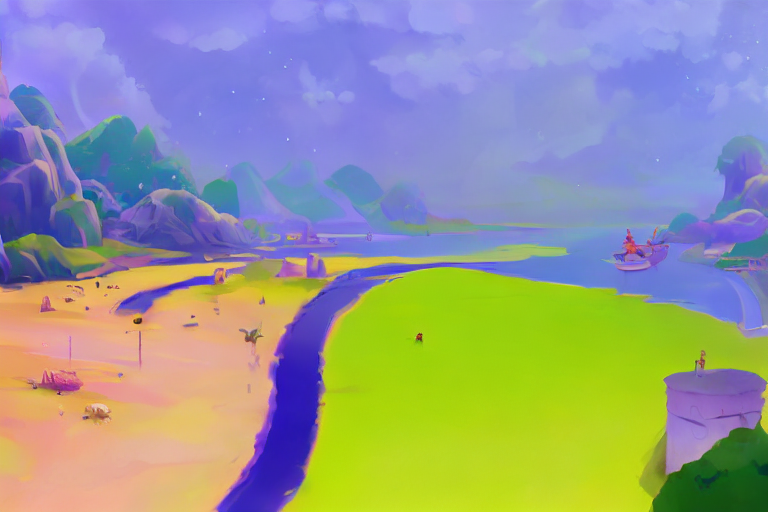

In [17]:
# 风景图草图链接
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

# 使用requests包获取草图, 输入为风景图草图链接
response = requests.get(url)

# 使用Image包读取风景图草图，并将其转换为"RGB"格式
init_image = Image.open(BytesIO(response.content)).convert("RGB")

# 调整草图格式
init_image = init_image.resize((768, 512))

# 给出提示指令，你想要的的图像效果
Prompt = "ArtStation 上流行的奇幻风景"

# 将提示指令(Prompt)和初始图像/草图（init_image）传入模型pipeline
images = pipe(prompt=Prompt, image=init_image, strength=0.75, guidance_scale=7.5).images

images[0]

In [7]:
# 保存图像到本地
images[0].save("fantasy_landscape.png")

## 3 对HuggingFace图生图模型进行微调

